In [56]:
# Data Imports
import numpy as np
import pandas as pd


# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [57]:
# Reading csv files
games_women = pd.read_csv('athletes-women.csv')
games_men = pd.read_csv('athletes-men.csv')
athletes = pd.read_csv('athletes-all.csv')

# athletes who made it into the games
games_all = pd.concat([games_women, games_men])
games_women = games_women.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])
games_men = games_men.drop(columns = ['rank', 'latitude', 'longitude', 'name', 'region'])

/Users/allisontao/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [58]:
df = athletes.merge(games_all.drop_duplicates(), on=['athlete_id'],
                   how='left', indicator=True)

In [59]:
# taking only the columns we want
df_all = df[['athlete_id', 'age_x', 'gender', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', '_merge', 'train', 'experience', 'schedule', 'howlong_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x']]
df_all = df_all.dropna()

df_all_women = df_all.loc[df_all['gender'] == 'Female']

In [60]:
# ones who have not made it who have stats filled out, temp while cleaning up
def make_columns_numeric(df):    
    not_make = df.loc[df['_merge'] == 'left_only']
    not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)

    col         = 'howlong_x'
    conditions  = [ not_make[col].str.contains("Less"), not_make[col].str.contains("6-12"), not_make[col].str.contains("1-2"), not_make[col].str.contains("2-4"), not_make[col].str.contains("4+") ]
    choices     = [0,1,2,3,4]

    not_make["howlong"] = np.select(conditions, choices)

    not_make['coach'] = np.where(not_make['train'].str.contains("have a coach"), 1, 0)
    not_make['certification'] = np.where(not_make['experience'].str.contains("Level 1"), 1, 0)
    not_make['multiple'] = np.where(not_make['schedule'].str.contains("multiple workouts"), 1, 0)

    return not_make

not_make_women = make_columns_numeric(df_all_women)


<ipython-input-60-1facb267e819>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make['howlong_x'] = not_make['howlong_x'].str.slice(0, 6)
<ipython-input-60-1facb267e819>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_make["howlong"] = np.select(conditions, choices)
<ipython-input-60-1facb267e819>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [61]:
#not_in_games will contain all athletes that did not make it, with stats, with cleaned up columns
not_in_games_women = not_make_women[['athlete_id', 'age_x', 'height_x', 'weight_x', 'fran_x', 'run5k_x', 'pullups_x', 'run400_x', 'candj_x', 'snatch_x', 'deadlift_x', 'backsq_x','howlong','coach','certification','multiple']]
not_in_games_women.rename(columns={"age_x": "age",'height_x': 'height', 'weight_x':'weight', 'fran_x':'fran', 'run5k_x':'run5k','pullups_x':'pullups', 'run400_x':'run400', 'candj_x':'candj', 'snatch_x':'snatch', 'deadlift_x':'deadlift', 'backsq_x':'backsq'}, inplace = True)

/Users/allisontao/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [62]:
#Min and Max of women
#On August 31st, Marisa Flowers performed the CrossFit® WOD “Fran” in 1 minute 53 seconds.
not_in_games_women2 = not_in_games_women.loc[(not_in_games_women["height"] <= 108) & (not_in_games_women["weight"] <= 1400) &(not_in_games_women["fran"] <= 600) & (not_in_games_women["fran"] >= 113) & (not_in_games_women["run400"] <= 180)]
not_in_games_women2.agg([min, max])



,athlete_id,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
min,1659.0,15.0,1.0,55.0,125.0,480.0,0.0,51.0,0.0,0.0,0.0,0.0,0,0,0,0
max,591544.0,55.0,74.0,235.0,600.0,2565.0,100.0,170.0,355.0,285.0,606.0,551.0,4,1,1,1


In [ ]:
games_women['in_games'] = 1
not_in_games_women2['in_games'] = 0

In [ ]:
df_women = not_in_games_women2.append(games_women)

# Drop ID column
df_women = df_women.drop(['athlete_id'],axis=1)

# Histograms

In [64]:
df_women.groupby('in_games').mean()

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,howlong,coach,certification,multiple
in_games,,,,,,,,,,,,,,,
0,33.357374,64.952637,140.607104,325.848224,1486.930032,23.749193,83.156082,151.541442,114.654467,268.969860,213.751346,2.942949,0.435953,0.516685,0.491927
1,36.631111,64.808889,140.288889,199.937778,1323.351111,43.186667,81.320000,190.804444,150.480000,315.257778,260.591111,2.986667,0.635556,0.591111,0.666667


In [65]:
#Separating in and not in games
df_women_ingames = df_women.loc[df_women['in_games'] == 1]
df_women_nogames = df_women.loc[df_women['in_games'] == 0]

### Age

Text(0.5, 1.0, 'Overlapping plots')

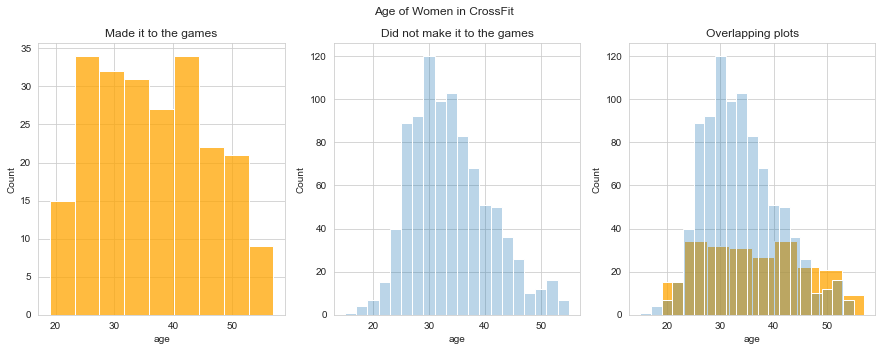

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Age of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="age", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="age", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="age", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="age", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Weight

Text(0.5, 1.0, 'Overlapping plots')

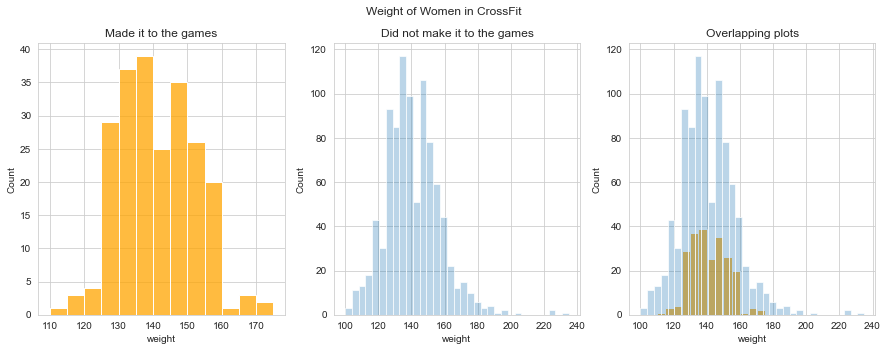

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Weight of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="weight", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="weight", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="weight", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="weight", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Height

Text(0.5, 1.0, 'Overlapping plots')

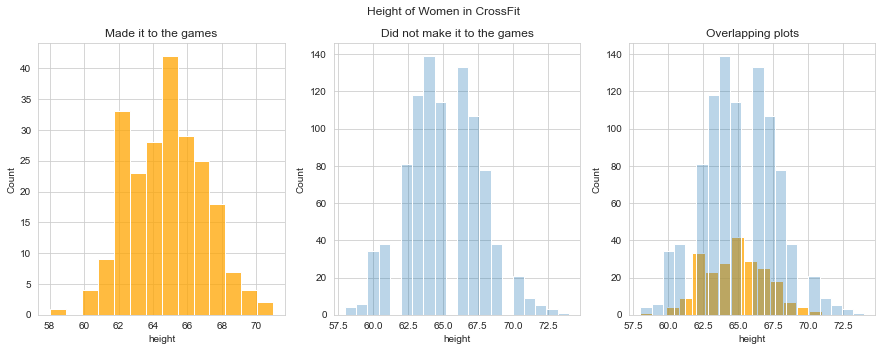

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Height of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="height", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="height", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="height", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="height", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run5k

Text(0.5, 1.0, 'Overlapping plots')

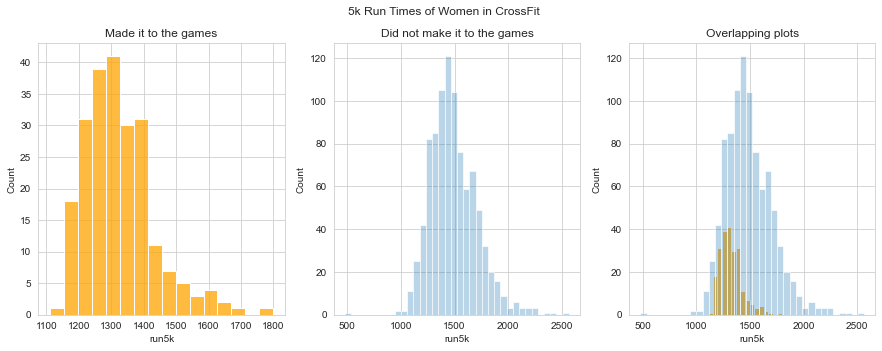

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('5k Run Times of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="run5k", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="run5k", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="run5k", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="run5k", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Run400

Text(0.5, 1.0, 'Overlapping plots')

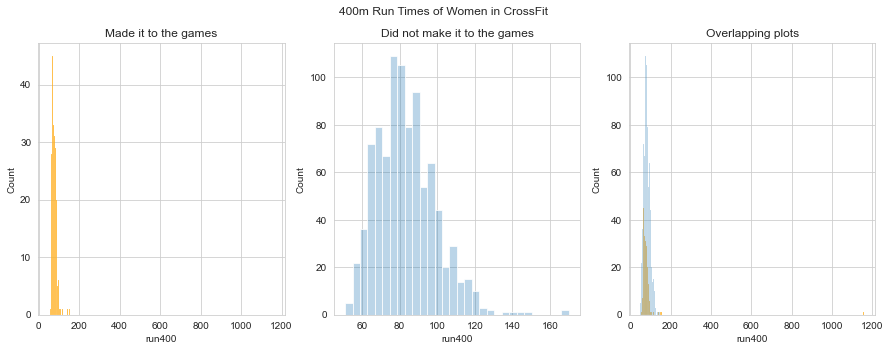

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('400m Run Times of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="run400", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="run400", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="run400", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="run400", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Clean and Jerk (candj)

Text(0.5, 1.0, 'Overlapping plots')

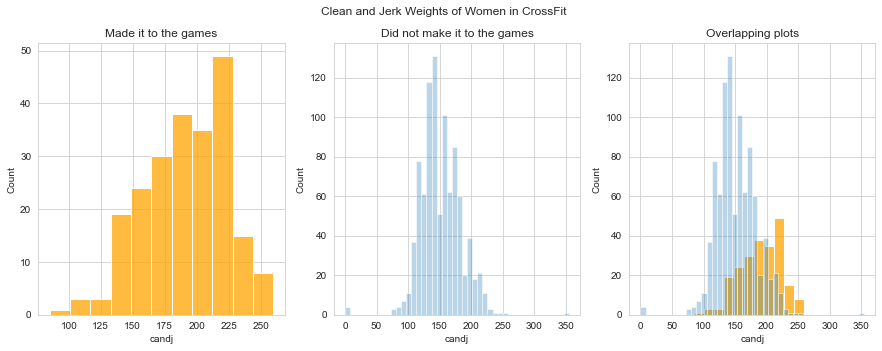

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Clean and Jerk Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="candj", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="candj", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="candj", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="candj", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Snatch

Text(0.5, 1.0, 'Overlapping plots')

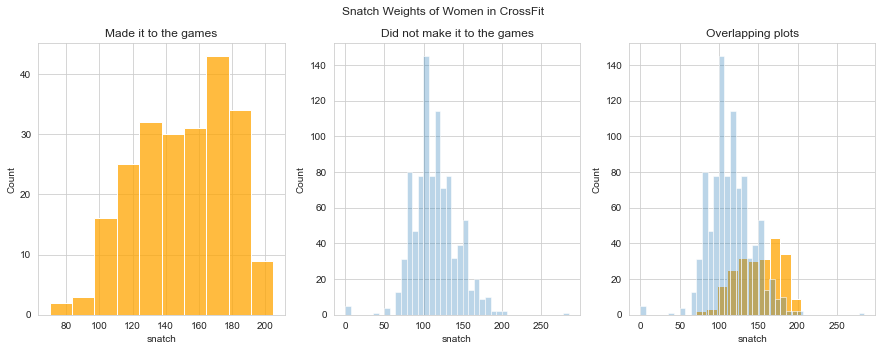

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Snatch Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="snatch", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="snatch", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="snatch", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="snatch", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Back Squat (backsq)

Text(0.5, 1.0, 'Overlapping plots')

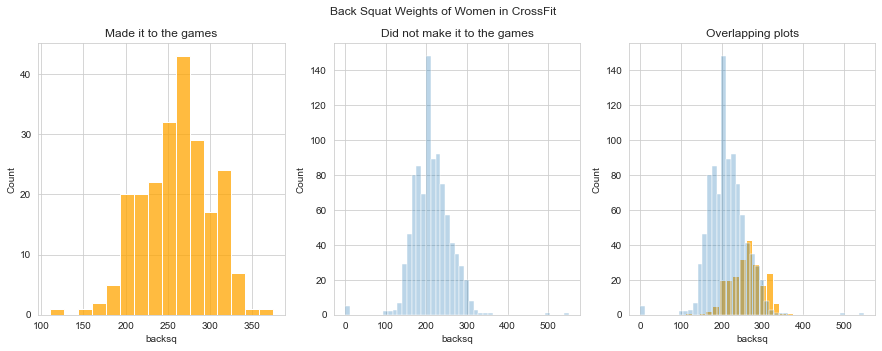

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Back Squat Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="backsq", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="backsq", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="backsq", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="backsq", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Deadlift

Text(0.5, 1.0, 'Overlapping plots')

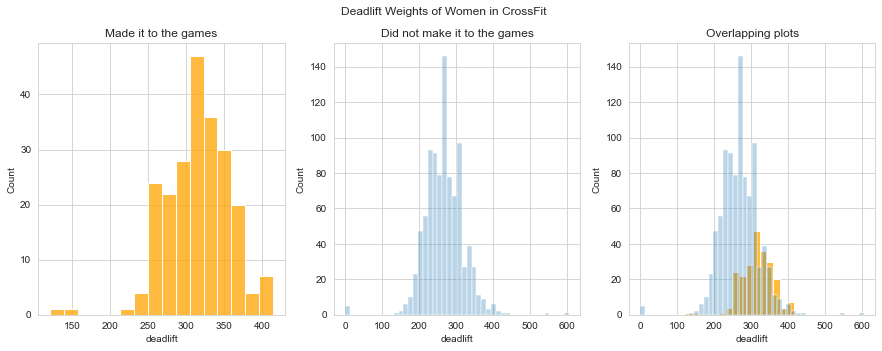

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Deadlift Weights of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="deadlift", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="deadlift", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="deadlift", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="deadlift", alpha=0.3)
axes[2].set_title("Overlapping plots")

### Pullups

Text(0.5, 1.0, 'Overlapping plots')

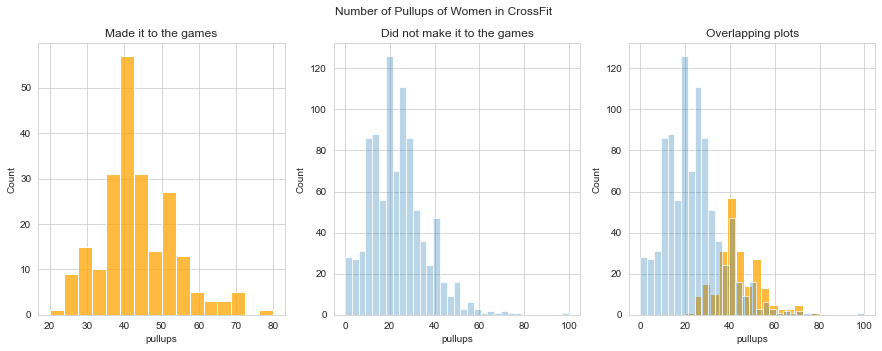

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Number of Pullups of Women in CrossFit')

# In games
sns.histplot(ax=axes[0],data=df_women_ingames, x="pullups", color="orange")
axes[0].set_title("Made it to the games")

# Not
sns.histplot(ax=axes[1],data=df_women_nogames, x="pullups", alpha=0.3)
axes[1].set_title("Did not make it to the games")

#Overlay
sns.histplot(ax=axes[2],data=df_women_ingames, x="pullups", color="orange")
sns.histplot(ax=axes[2],data=df_women_nogames, x="pullups", alpha=0.3)
axes[2].set_title("Overlapping plots")

## Clean up Categorical

In [76]:
# Create Dataframes for Categorical Variables
howlong_women_dummies = pd.get_dummies(df_women['howlong']) # women athletes

howlong_women_dummies

,0,1,2,3,4
64482,0,0,0,1,0
97672,0,0,1,0,0
144480,0,0,1,0,0
159571,0,0,0,0,1
159574,0,0,0,0,1
...,...,...,...,...,...
220,0,0,0,0,1
221,0,0,1,0,0
222,0,1,0,0,0
223,0,0,0,1,0


In [77]:
# Create column names for the new DataFrames
howlong_women_dummies.columns = ['hl1','hl2','hl3','hl4','hl5']

In [78]:
# Set X as new DataFrame without the howlong columns or the Y target
X_w = df_women.drop(['howlong'],axis=1)

In [79]:
# Now Concat the X DataFrame with the dummy variables
X_w = pd.concat([X_w,howlong_women_dummies],axis=1)

# Preview of Result
X_w.head()

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,coach,certification,multiple,in_games,hl1,hl2,hl3,hl4,hl5
64482,32.0,66.0,135.0,264.0,1355.0,36.0,75.0,165.0,125.0,266.0,195.0,1,0,0,0,0,0,0,1,0
97672,32.0,69.0,185.0,455.0,2172.0,20.0,137.0,115.0,85.0,205.0,155.0,0,0,0,0,0,0,1,0,0
144480,40.0,64.0,168.0,380.0,1753.0,6.0,108.0,140.0,90.0,295.0,225.0,1,0,1,0,0,0,1,0,0
159571,29.0,64.0,135.0,159.0,1195.0,44.0,65.0,210.0,163.0,330.0,270.0,1,1,1,0,0,0,0,0,1
159574,34.0,61.0,130.0,164.0,1269.0,37.0,70.0,173.0,138.0,333.0,253.0,0,1,1,0,0,0,0,0,1


In [80]:
# Set Y as Target class, in games, for men and women
Y_w = df_women.in_games

# Preview
Y_w

64482     0
97672     0
144480    0
159571    0
159574    0
         ..
220       1
221       1
222       1
223       1
224       1
Name: in_games, Length: 1154, dtype: int64

In [81]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X_w = X_w.drop(['hl1'],axis=1)

# Drop affairs column so Y target makes sense
X_w = X_w.drop(['in_games'],axis=1)

# Preview
X_w.head()

,age,height,weight,fran,run5k,pullups,run400,candj,snatch,deadlift,backsq,coach,certification,multiple,hl2,hl3,hl4,hl5
64482,32.0,66.0,135.0,264.0,1355.0,36.0,75.0,165.0,125.0,266.0,195.0,1,0,0,0,0,1,0
97672,32.0,69.0,185.0,455.0,2172.0,20.0,137.0,115.0,85.0,205.0,155.0,0,0,0,0,1,0,0
144480,40.0,64.0,168.0,380.0,1753.0,6.0,108.0,140.0,90.0,295.0,225.0,1,0,1,0,1,0,0
159571,29.0,64.0,135.0,159.0,1195.0,44.0,65.0,210.0,163.0,330.0,270.0,1,1,1,0,0,0,1
159574,34.0,61.0,130.0,164.0,1269.0,37.0,70.0,173.0,138.0,333.0,253.0,0,1,1,0,0,0,1


In [82]:
# Flatten array
Y_w = np.ravel(Y_w)

# Check result
Y_w

array([0, 0, 0, ..., 1, 1, 1])

# Logistic Regression

In [83]:
# Create LogisticRegression model
log_model_w = LogisticRegression()

# Fit our data
log_model_w.fit(X_w,Y_w)

# Check our accuracy
log_model_w.score(X_w,Y_w)

/Users/allisontao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8882149046793761

In [84]:
# Check percentage of women that made it to the games
Y_w.mean()

0.1949740034662045

In [85]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df_w = pd.DataFrame(zip(X_w.columns,np.transpose(log_model_w.coef_)))
coeff_df_w

,0,1
0,age,[0.14371562004939323]
1,height,[-0.11641837716502328]
2,weight,[-0.01245885529149609]
3,fran,[-0.00559503286835479]
4,run5k,[-0.003701332451060653]
5,pullups,[0.03736533678973305]
6,run400,[0.013923630562611526]
7,candj,[0.02064534584998619]
8,snatch,[0.027381354112882117]
9,deadlift,[0.0008005305208824722]


#### Testing and Training Sets

In [86]:
# Split the data
X_w_train, X_w_test, Y_w_train, Y_w_test = train_test_split(X_w,Y_w)

# Make a new log_model
log_model2_w = LogisticRegression()

# Now fit the new model
log_model2_w.fit(X_w_train,Y_w_train)

/Users/allisontao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Confusion Matrix

In [89]:
# Predict the classes of the testing data set
class_predict_w = log_model2_w.predict(X_w_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_w_test,class_predict_w)

0.8858131487889274

In [90]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

def confusion_matrix(y, y_pred):
    cm = sk_confusion_matrix(y, y_pred)
    cm = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm.columns.name = 'Predicted label'
    cm.index.name = 'True label'
    error_rate = (y_pred != y).mean()
    print('error rate: %.2f' % error_rate)
    return cm

confusion_matrix(Y_w_test, class_predict_w)

error rate: 0.11


Predicted label,0,1
True label,,
0,210,11
1,22,46
